In [1]:
# Importando as bibliotecas necessárias
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import History, EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Importando o dataset mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

** Análise Exploratória **

In [3]:
# Exibindo algumas informações sobre os dados

# Verificando as quantidades de imagens e de rótulos
print("Número de imagens de treinamento:", len(train_images))
print("Número de rótulos de treinamento:", len(train_labels))
print("Número de imagens de teste:", len(test_images))
print("Número de rótulos de teste:", len(test_labels))

# Verificando o o formato das imagens
print("Formato das imagens de treinamento:", train_images[0].shape)

# Imprimindo os 10 primeiros rótulos
print("10 primeiros rótulos de treinamento:", train_labels[:10])

Número de imagens de treinamento: 60000
Número de rótulos de treinamento: 60000
Número de imagens de teste: 10000
Número de rótulos de teste: 10000
Formato das imagens de treinamento: (28, 28)
10 primeiros rótulos de treinamento: [5 0 4 1 9 2 1 3 1 4]


In [4]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [5]:
# Verificando as quantidades de imagens e de rótulos - validação e treino
print("Número de imagens de treinamento:", len(train_images))
print("Número de rótulos de treinamento:", len(train_labels))
print("Número de imagens de teste:", len(val_images))
print("Número de rótulos de teste:", len(val_labels))

Número de imagens de treinamento: 48000
Número de rótulos de treinamento: 48000
Número de imagens de teste: 12000
Número de rótulos de teste: 12000


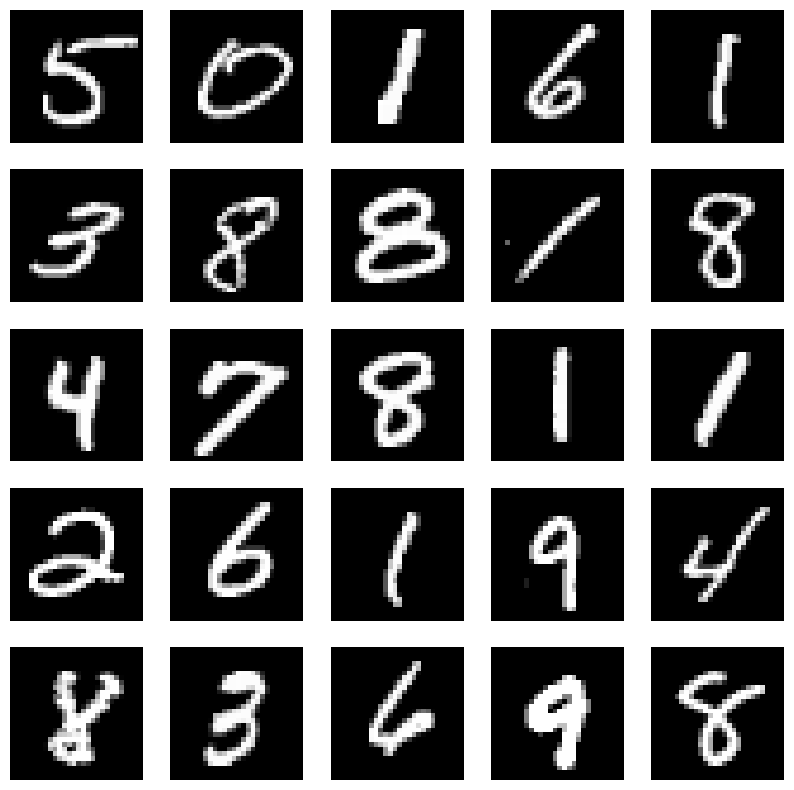

In [6]:
# Visualizando algumas imagens de exemplo
plt.figure(figsize=(10, 10))


for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

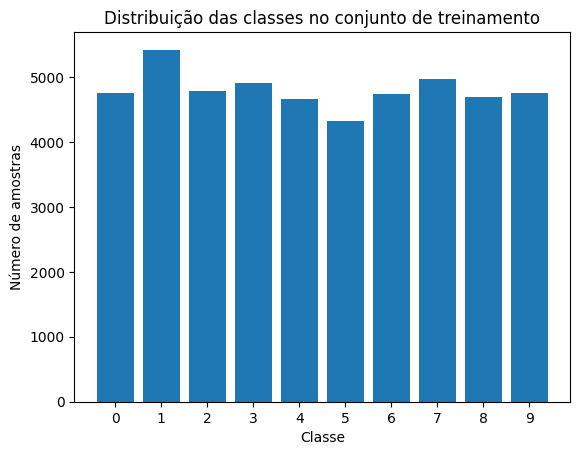

In [7]:
# Contar o número de amostras em cada classe
unique_classes, counts = np.unique(train_labels, return_counts=True)

# Plotar um gráfico de barras para observar a distribuição de dados por classe
plt.bar(unique_classes, counts)
plt.title('Distribuição das classes no conjunto de treinamento')
plt.xlabel('Classe')
plt.ylabel('Número de amostras')
plt.xticks(unique_classes)
plt.show()

In [8]:
# Verificar como são as matrizes das imagens, por meio de um exemplo
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 119 145  25   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  63 235 222 124  18  37  37
   54 157 157 123  37   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 123 234 214  71 101 21

** Rede Neural Densa **

In [ ]:
, kernel_regularizer=tf.keras.regularizers.l2(0.001)

In [9]:
# Definindo o modelo e suas camadas
model = tf.keras.models.Sequential([
  # Transformar a imagem em um vetor
  tf.keras.layers.Flatten(),
  # Definir uma camada densa com 128 neurônios e seguindo a função de ativação relu
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  # Definir outra camada densa com 10 neurônios, representando cada uma das 10 classes possíveis, e seguindo a função de ativação softmax
  tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = History()

In [12]:
# Definindo o early stop para monitorar a perda da validação e com paciencia igual a 3
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [13]:
# Treinando o modelo
model.fit(train_images, train_labels, epochs=100, validation_data=(val_images, val_labels), callbacks=[history, early_stopping])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4761 - loss: 6.3575 - val_accuracy: 0.8518 - val_loss: 0.5803
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7495 - loss: 0.8420 - val_accuracy: 0.8905 - val_loss: 0.4000
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8043 - loss: 0.6778 - val_accuracy: 0.9103 - val_loss: 0.3535
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8427 - loss: 0.5399 - val_accuracy: 0.9197 - val_loss: 0.3246
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8724 - loss: 0.4514 - val_accuracy: 0.9312 - val_loss: 0.2681
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8815 - loss: 0.4129 - val_accuracy: 0.9335 - val_loss: 0.2683
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8931 - loss: 0.3776 - val_accuracy: 0.9359 - val_loss: 0.2738
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9015 - loss: 

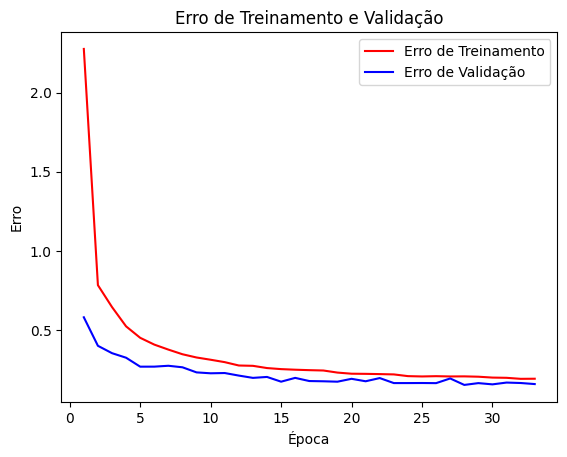

In [14]:
# Extrair os dados de erro do histórico do treinamento
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Criar um gráfico comparando os erros por época
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Erro de Treinamento')
plt.plot(epochs, val_loss, 'b', label='Erro de Validação')
plt.title('Erro de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()
plt.show()

In [15]:
# Fazendo previsões usando o modelo
predictions = model.predict(test_images)

# Obter os rótulos previstos convertendo de one-hot encoding para rótulos de classe únicos
y_pred = np.argmax(predictions, axis=1)

# Rótulos verdadeiros
y_true = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [16]:
# Pré-avaliar o modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9528 - loss: 0.1826
Test loss: 0.1558108627796173
Test accuracy: 0.9603999853134155


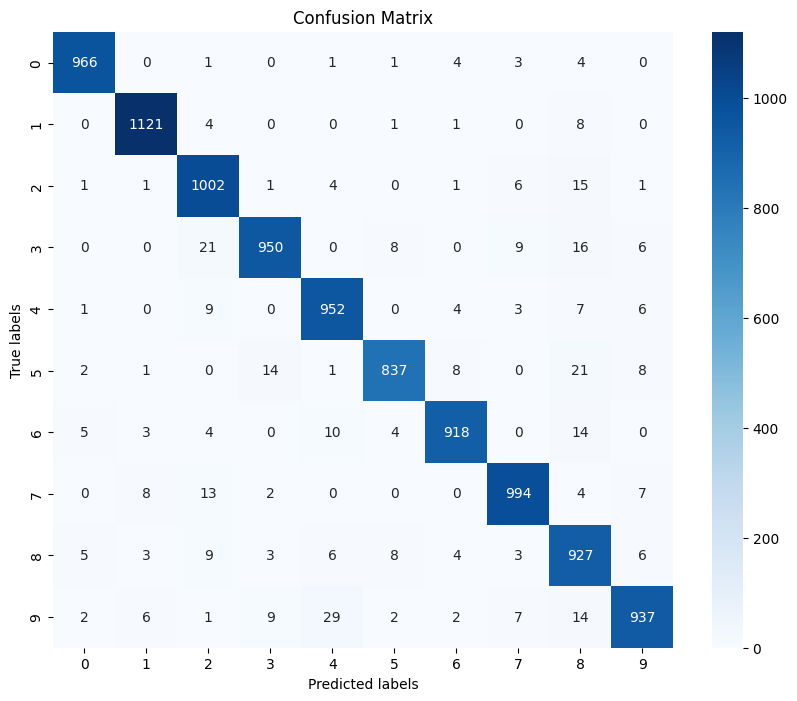

In [17]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)

# Definir os rótulos das classes
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Plotar a matriz de confusão como um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

** CNN **

In [18]:
# Pré-processando as imagens para aplicar o CNN

# Adicionando a escala de cinza e garantindo que esses valores estejam entre 0 e 1
train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
val_images_cnn = val_images.reshape((val_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Convertendo os rótulos para o formato one-hot-encoding
train_labels_cnn = tf.keras.utils.to_categorical(train_labels)
test_labels_cnn = tf.keras.utils.to_categorical(test_labels)
val_labels_cnn = tf.keras.utils.to_categorical(val_labels)

In [19]:
# Definindo o modelo

model_cnn = tf.keras.models.Sequential([
    # Definir uma camada convolucional com 32 filtros de tamanho 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Definir uma camada de pooling de tamanho 2x2 para evitar overfitting
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Definir uma camada convolucional com 64 filtros de tamanho 3x3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Definir uma camada de pooling de tamanho 2x2 para evitar overfitting
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Definir uma camada convolucional com 64 filtros de tamanho 3x3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Transformar a imagem em um vetor
    tf.keras.layers.Flatten(),
    # Definir uma camada densa com 128 neurônios e seguindo a função de ativação relu
    tf.keras.layers.Dense(64, activation='relu'),
    # Definir outra camada densa com 10 camadas, representando cada uma das 10 classes possíveis, e seguindo a função de ativação softmax
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\018118631\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
# Compilação do modelo
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Definindo o histórico
history_cnn = History()

In [22]:
# Treinamento do modelo
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs=5, validation_data=(val_images_cnn, val_labels_cnn), callbacks=[history_cnn])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8778 - loss: 0.3824 - val_accuracy: 0.9794 - val_loss: 0.0666
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9820 - loss: 0.0581 - val_accuracy: 0.9868 - val_loss: 0.0444
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 0.9885 - val_loss: 0.0382
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9886 - val_loss: 0.0385
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9893 - val_loss: 0.0412


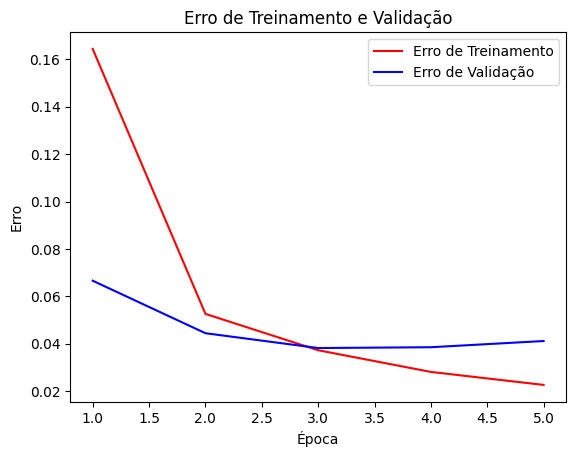

In [23]:
# Extrair os dados de erro do histórico do treinamento
train_loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

# Criar um gráfico comparando os erros por época
epochs_cnn = range(1, len(train_loss_cnn) + 1)
plt.plot(epochs_cnn, train_loss_cnn, 'r', label='Erro de Treinamento')
plt.plot(epochs_cnn, val_loss_cnn, 'b', label='Erro de Validação')
plt.title('Erro de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()
plt.show()

O gráfico demonstra overfitting. Vamos realizar alguns ajustes como a regularização L2 e implementação do early stopping e observar se o modelo se comporta melhor.

In [40]:
# Definindo o modelo

model_cnn_2 = tf.keras.models.Sequential([
    # Definir uma camada convolucional com 32 filtros de tamanho 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # Definir uma camada de pooling de tamanho 2x2 para evitar overfitting
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Definir uma camada convolucional com 64 filtros de tamanho 3x3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # Definir uma camada de pooling de tamanho 2x2 para evitar overfitting
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Definir uma camada convolucional com 64 filtros de tamanho 3x3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # Transformar a imagem em um vetor
    tf.keras.layers.Flatten(),
    # Definir uma camada densa com 128 neurônios e seguindo a função de ativação relu
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    # Definir outra camada densa com 10 camadas, representando cada uma das 10 classes possíveis, e seguindo a função de ativação softmax
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

In [41]:
# Compilação do modelo
model_cnn_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# Redefinindo a variável de histórico
history_cnn = History()

In [43]:
# Definindo o early stop para monitorar a perda da validação e com paciencia igual a 3
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [44]:
# Treinamento do modelo
model_cnn_2.fit(train_images_cnn, train_labels_cnn, epochs=100, validation_data=(val_images_cnn, val_labels_cnn), callbacks=[history_cnn, early_stopping])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8048 - loss: 0.7946 - val_accuracy: 0.9707 - val_loss: 0.2744
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9639 - loss: 0.3006 - val_accuracy: 0.9791 - val_loss: 0.2199
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9686 - loss: 0.2625 - val_accuracy: 0.9792 - val_loss: 0.2118
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9717 - loss: 0.2458 - val_accuracy: 0.9835 - val_loss: 0.1981
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9748 - loss: 0.2351 - val_accuracy: 0.9814 - val_loss: 0.2007
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9745 - loss: 0.2331 - val_accuracy: 0.9831 - val_loss: 0.1879
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9744 - loss: 0.2257 - val_accuracy: 0.9818 - val_loss: 0.1919
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 

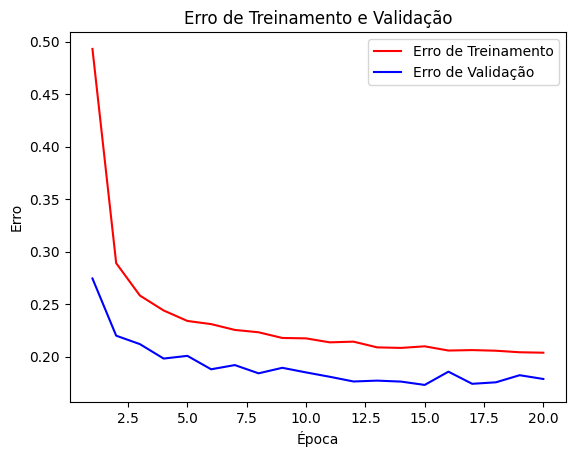

In [45]:
# Extrair os dados de erro do histórico do treinamento
train_loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

# Criar um gráfico comparando os erros por época
epochs_cnn = range(1, len(train_loss_cnn) + 1)
plt.plot(epochs_cnn, train_loss_cnn, 'r', label='Erro de Treinamento')
plt.plot(epochs_cnn, val_loss_cnn, 'b', label='Erro de Validação')
plt.title('Erro de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()
plt.show()

In [46]:
# Fazer previsões usando o modelo
predictions_cnn = model_cnn.predict(test_images_cnn)

# Obter os rótulos previstos convertendo de one-hot encoding para rótulos de classe únicos
y_pred_cnn = np.argmax(predictions_cnn, axis=1)

# Rótulos verdadeiros
y_true_cnn = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [47]:
# Avaliação do modelo
test_loss, test_acc = model_cnn.evaluate(test_images_cnn, test_labels_cnn)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9894 - loss: 0.0374
Test accuracy: 0.9915000200271606


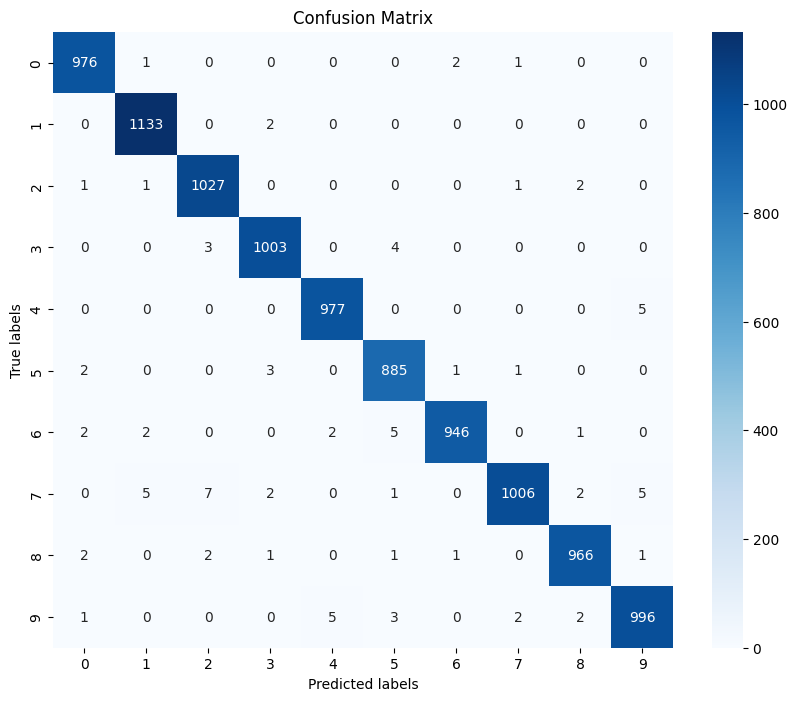

In [48]:
# Calcular a matriz de confusão
conf_matrix_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

# Plotar a matriz de confusão como um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()